# Duality of Broadcast and Multiple Access Channels

Python script for illustrating duality of BC and MAC with
superposition coding with successive cancellation,

construction of BC rate region by unifying MAC rate regions

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------------------------------------------------------------------------------------------------
# parameter definitions
# ---------------------------------------------------------------------------------------------------------------------

# SNRs of both channels
SNR1dB = 10
SNR2dB = 7

SNR1 = 10**(SNR1dB/10)
SNR2 = 10**(SNR2dB/10)

# power split parameter for BC (downlink)
alpha = np.arange(0.001,0.999,0.001)

Individual link capacities for two users for AWGN channels with Gaussian inputs are
\begin{align*}
    C_1 &= \log_2(1 + \mathsf{SNR}_1) \\
    C_2 &= \log_2(1 + \mathsf{SNR}_2) \; .
\end{align*}

Individual link capacities for two users for AWGN channels with Gaussian inputs are
\begin{align*}
    C_1 &= \log_2(1 + \mathsf{SNR}_1) \\
    C_2 &= \log_2(1 + \mathsf{SNR}_2) \; .
\end{align*}

In [2]:
# channel capacities for individual channels
C1 = np.log2(1+alpha*SNR1)
C2 = np.log2(1+(1-alpha)*SNR2)

In [3]:
# -----------------------------------------------------------------------
# BC (downlink)
# Capacities on boundary of capacity region
C1_BC = np.log2(1+alpha*SNR1)
C2_BC = np.log2(1+((1-alpha)*SNR2)/(1+alpha*SNR2))

In [4]:
# -----------------------------------------------------------------------
# MAC (uplink)
C1_2_MAC = np.log2(1+alpha*SNR1/(1+(1-alpha)*SNR2))
C2_1_MAC = np.log2(1+(1-alpha)*SNR2/(1+alpha*SNR1))

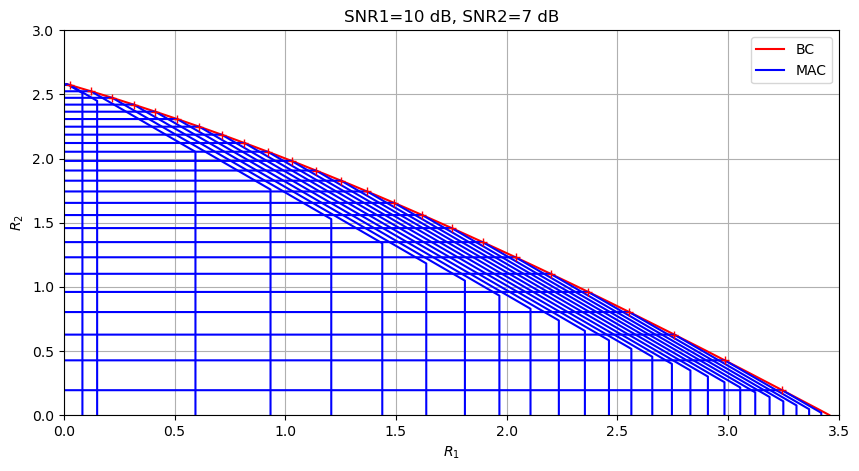

In [6]:
# power split elements for plot
ptr = range(10,len(alpha),40)


fig_1 = plt.figure(figsize=(10,5))
ax = fig_1.add_subplot(111)
ax.plot(C1_BC,C2_BC,'r-',label='BC')
x = [0., C1_2_MAC[5], C1[5], C1[5]]
y = [C2[5], C2[5], C2_1_MAC[5], 0.]
ax.plot(x, y,'b-',label='MAC')
for run in ptr:
    x = [0., C1_2_MAC[run], C1[run], C1[run]]
    y = [C2[run], C2[run], C2_1_MAC[run], 0.]
    ax.plot(x, y,'b-')
    ax.plot(C1_2_MAC[run], C2[run], 'r+')
plt.grid(True)
plt.legend()
plt.xlim(0, 3.5)
plt.ylim(0, 3.0)
plt.xlabel('$R_1$')
plt.ylabel('$R_2$')
plt.title('SNR1=%d dB, SNR2=%d dB' %(SNR1dB, SNR2dB))
plt.show()